## handling outliers

In [2]:
# imports
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

Outliers in Data Science: Unraveling the Unusual

In the realm of data science, anomalies often lurk within datasets, waiting to disrupt analyses and skew results. These anomalies, known as outliers, hold the potential to mislead, confuse, and sometimes even provide unique insights. In this article, we embark on a journey to understand the world of outliers – what they are, why they matter, and how to effectively handle them.

What Are Outliers? Outliers are data points that significantly deviate from the norm. They can be unusually high or low values that don't align with the overall pattern of the dataset. Outliers can stem from various sources, including measurement errors, data entry mistakes, or genuine rare events.

Why Do Outliers Matter? Outliers hold the power to distort statistical analyses and machine learning models, leading to inaccurate predictions and biased results. Failing to address outliers can undermine the integrity of your insights and decision-making. However, outliers are not always undesirable; in some cases, they might represent critical information, such as fraudulent transactions or rare disease occurrences.

Detecting Outliers:

Visualizations: Box plots, scatter plots, and histograms can help visualize the distribution of data and identify potential outliers.
Z-Score: The z-score measures how many standard deviations a data point is away from the mean. A z-score greater than a threshold (often 2 or 3) might indicate an outlier.
IQR (Interquartile Range): The IQR is the range between the first quartile (25th percentile) and the third quartile (75th percentile). Data points outside a certain range of the IQR are considered outliers.
Distance-based Methods: Techniques like k-nearest neighbors or DBSCAN can help identify data points that are far from their neighbors.
Dealing with Outliers:

Removal: In some cases, outliers can be removed from the dataset. However, this approach must be undertaken cautiously, as removing too many data points might lead to loss of valuable information.
Transformation: Applying mathematical transformations like log or square root can normalize data and reduce the impact of outliers.
Capping or Flooring: Replacing extreme values with a predefined maximum or minimum value can help mitigate the effect of outliers.
Imputation: Replacing outliers with more reasonable values derived from interpolation or other imputation methods can improve the dataset's quality.
Model Robustness: Utilizing algorithms that are less sensitive to outliers, such as Random Forest or Support Vector Machines, can help mitigate the impact of outliers on the model's performance.

In [3]:
data = pd.read_csv('rawdata\csv\scholarship.csv')

df1 = data.copy()

df1.head()

,semester_percentage,scholarship_exam_marks,got_scholarship
0,71.9,26,1
1,74.6,38,1
2,75.4,40,1
3,64.2,8,1
4,72.3,17,0


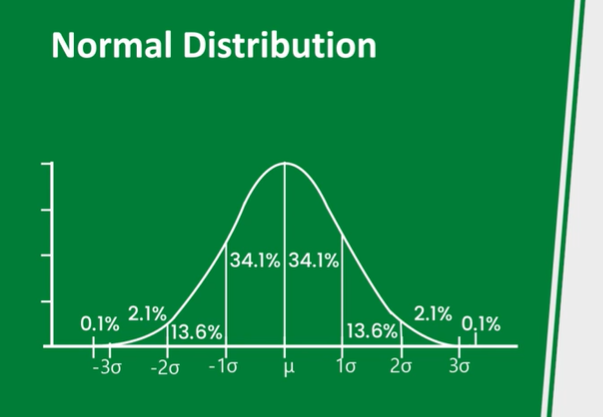

Identifying Data Anomalies with Z-Score and Python

Outliers, those mysterious data points that deviate significantly from the norm, can wreak havoc on analyses and models. Fortunately, the Z-score method offers a powerful tool to detect these outliers. In this article, we'll explore the Z-score technique, understand its significance, and provide a step-by-step code example in Python.

Understanding Z-Score: The Z-score measures how many standard deviations a data point is away from the mean. In other words, it quantifies the relative distance of a data point from the average. A high Z-score indicates that the data point is far from the mean, suggesting the possibility of an outlier.

The Formula: The formula to calculate the Z-score for a data point x is:

Z = \frac{x - \mu}{\sigma}
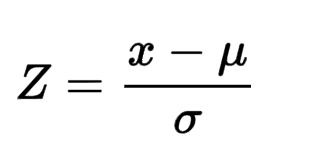


Where:

x is observed value
μ is the mean of the dataset.
σ is the standard deviation of the dataset.
Detecting Outliers with Z-Score:

Calculate the mean (μ) and standard deviation (σ) of the dataset.

For each data point (x) in the dataset, compute its Z-score.

Set a Z-score threshold (commonly 2 or 3) beyond which data points are considered outliers.

Identify data points with Z-scores greater than the threshold as potential outliers.

In [4]:
import numpy as np

# Generate example data, here we can see thta 100 is an outlier 
data = np.array([23, 25, 22, 27, 21, 24, 26, 100, 23, 28, 22, 29])

# Calculate mean and standard deviation
mean = np.mean(data)
std_dev = np.std(data)
print('mean :', mean, 'statndard Dev :', std_dev)
# Set Z-score threshold
z_threshold = 2

# Calculate Z-scores
z_scores = [(x - mean) / std_dev for x in data]
print(z_scores)
# Identify outliers
outliers = [data[i] for i, z in enumerate(z_scores) if abs(z) > z_threshold]

print("Original Data:", data)
print("Outliers detected using Z-score:", outliers)

mean : 30.833333333333332 statndard Dev : 20.99536985993711
[np.float64(-0.3730981347597368), np.float64(-0.27783903652320824), np.float64(-0.4207276838780011), np.float64(-0.18257993828667968), np.float64(-0.46835723299626536), np.float64(-0.3254685856414725), np.float64(-0.23020948740494396), np.float64(3.294377147346613), np.float64(-0.3730981347597368), np.float64(-0.1349503891684154), np.float64(-0.4207276838780011), np.float64(-0.08732084005015112)]
Original Data: [ 23  25  22  27  21  24  26 100  23  28  22  29]
Outliers detected using Z-score: [np.int64(100)]


In [5]:
scolrship = pd.read_csv('rawdata\csv\scholarship.csv')

df1 = scolrship.copy()
print(scolrship.info())
print('______________________________________________________')
print(df1.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   semester_percentage     1000 non-null   float64
 1   scholarship_exam_marks  1000 non-null   int64  
 2   got_scholarship         1000 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 23.6 KB
None
______________________________________________________
   semester_percentage  scholarship_exam_marks  got_scholarship
0                 71.9                      26                1
1                 74.6                      38                1
2                 75.4                      40                1
3                 64.2                       8                1
4                 72.3                      17                0


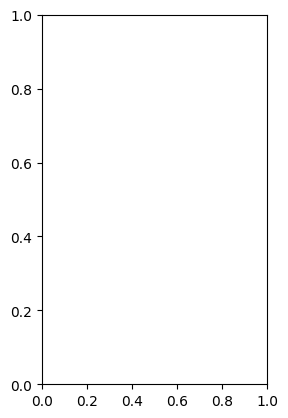

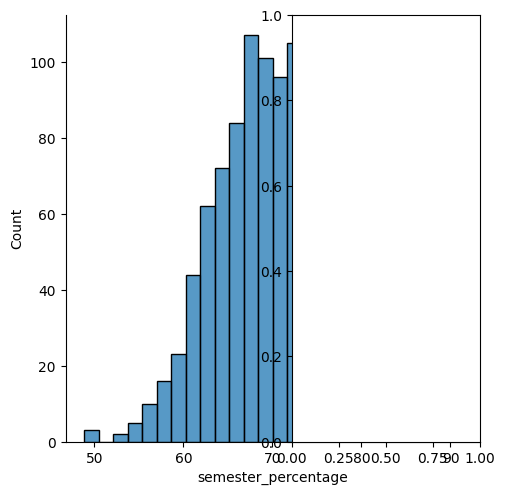

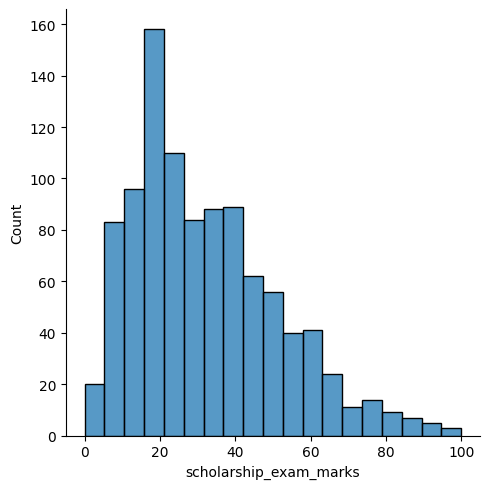

In [6]:
plt.subplot(1,2,1)
sns.displot(df1["semester_percentage"])
plt.subplot(1,2,2)
sns.displot(df1["scholarship_exam_marks"])
plt.show()

In [7]:
# values that are far away from 3 times std deviation are considered to be outliers

mean = df1['semester_percentage'].mean()
std_dev = df1['semester_percentage'].std()

#                = mean value + 3 times standard deviation
highest_allowed = mean + 3 * std_dev
lowest_allowed = mean - 3 * std_dev

print('mean :',mean)
print('standard dev :', std_dev)
print('highest alowed :', highest_allowed)
print('lowest alowed :', lowest_allowed)

mean : 69.6124
standard dev : 6.158978751323897
highest alowed : 88.08933625397168
lowest alowed : 51.13546374602831


In [8]:
# df1 now calculates values that are outside highest & lowest allowed
#data[(data["semester_percentage"]<51.13) | (data["semester_percentage"]>88.08) ]
df1[(df1['semester_percentage'] > highest_allowed)  | 
    (df1['semester_percentage'] < lowest_allowed)]

,semester_percentage,scholarship_exam_marks,got_scholarship
485,49.2,44,1
995,88.7,44,1
996,91.2,65,1
997,48.9,34,0
999,49.0,10,1


In [9]:
# trimming is process of removing outliers from dataset
df1[(df1['semester_percentage'] < highest_allowed)  &
    (df1['semester_percentage'] >  lowest_allowed)]

,semester_percentage,scholarship_exam_marks,got_scholarship
0,71.9,26,1
1,74.6,38,1
2,75.4,40,1
3,64.2,8,1
4,72.3,17,0
...,...,...,...
991,70.4,57,0
992,62.6,12,0
993,67.3,21,1
994,64.8,63,0


In [10]:
# Calculate Z-scores
#z_scores = [(x - mean) / std_dev for x in data]
z_scores = [(x - mean) /std_dev for x in df1['semester_percentage'] ]
print(z_scores)

# assigning new columns z_scores and updating values
df1['z_scores'] = z_scores

print(df1.head())

[np.float64(0.37142521388116223), np.float64(0.8098095806756755), np.float64(0.9397012449110893), np.float64(-0.8787820543846777), np.float64(0.4363710459988668), np.float64(0.5500262522048527), np.float64(-0.4403976875901621), np.float64(0.2577700076751764), np.float64(-0.8300726802963987), np.float64(1.2806668635290446), np.float64(-0.22932373320761823), np.float64(-0.9437278865023846), np.float64(-0.6189987259138549), np.float64(-2.0802799485622385), np.float64(1.5404501919998674), np.float64(0.22529709161632294), np.float64(-0.7001810160609873), np.float64(0.9721741609699404), np.float64(-0.050722694883927805), np.float64(1.0858293671759263), np.float64(-0.4403976875901621), np.float64(0.7611002065873965), np.float64(-0.32674248138417855), np.float64(-1.4795310014734582), np.float64(-0.8463091383258242), np.float64(-1.1060924667966494), np.float64(0.79357312264625), np.float64(-0.7001810160609873), np.float64(0.4363710459988668), np.float64(-0.7326539321198408), np.float64(0.809809

In [11]:
# calculate outlier using highest allowed using z-scores results would be same

# 1st way 
print(df1[(df1['semester_percentage'] > highest_allowed)  | 
    (df1['semester_percentage'] < lowest_allowed)])
print('__________________________________________________________')
print(df1[(df1['z_scores'] < -3) | (df1['z_scores'] > 3)])

     semester_percentage  scholarship_exam_marks  got_scholarship  z_scores
485                 49.2                      44                1 -3.314251
995                 88.7                      44                1  3.099150
996                 91.2                      65                1  3.505062
997                 48.9                      34                0 -3.362960
999                 49.0                      10                1 -3.346724
__________________________________________________________
     semester_percentage  scholarship_exam_marks  got_scholarship  z_scores
485                 49.2                      44                1 -3.314251
995                 88.7                      44                1  3.099150
996                 91.2                      65                1  3.505062
997                 48.9                      34                0 -3.362960
999                 49.0                      10                1 -3.346724


In [12]:
# if we remove outliers from the data , there are might changes we might loose important inf
# to avoid that we use capping
upper_limit = highest_allowed
lower_limit = lowest_allowed
df1["semester_percentage"] =np.where(df1["semester_percentage"]>upper_limit,
         upper_limit,
         np.where(df1["semester_percentage"]<lower_limit, lower_limit, df1["semester_percentage"] ))

In [13]:
df1

,semester_percentage,scholarship_exam_marks,got_scholarship,z_scores
0,71.900000,26,1,0.371425
1,74.600000,38,1,0.809810
2,75.400000,40,1,0.939701
3,64.200000,8,1,-0.878782
4,72.300000,17,0,0.436371
...,...,...,...,...
995,88.089336,44,1,3.099150
996,88.089336,65,1,3.505062
997,51.135464,34,0,-3.362960
998,86.200000,46,1,2.693239


## Power of IQR for Data Cleansing

In the realm of data analysis, outliers are like unruly outliers disrupting the harmony of your insights. However, fear not, for the Interquartile Range (IQR) comes to the rescue as a robust and effective tool for identifying and removing these data anomalies. In this article, we'll embark on a journey to understand the IQR method, its significance, and how it can be wielded to remove outliers with a practical Python example.

Understanding the Interquartile Range (IQR): The IQR is a statistical measure that quantifies the spread of data within the middle 50% of a dataset. It is the difference between the third quartile (75th percentile) and the first quartile (25th percentile). This measure is particularly robust against outliers since it focuses on the middle portion of the data distribution.

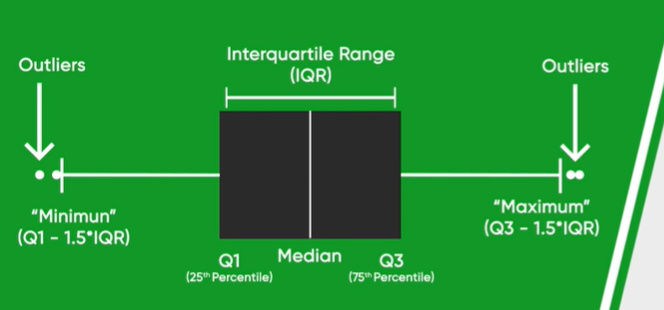

In [22]:
print(df1.describe())
print(df1.describe().loc['min'])

       semester_percentage  scholarship_exam_marks  got_scholarship  \
count          1000.000000             1000.000000      1000.000000   
mean             69.614985               32.225000         0.489000   
std               6.126884               19.130822         0.500129   
min              51.135464                0.000000         0.000000   
25%              65.500000               17.000000         0.000000   
50%              69.600000               28.000000         0.000000   
75%              73.700000               44.000000         1.000000   
max              88.089336              100.000000         1.000000   

           z_scores  
count  1.000000e+03  
mean   9.876544e-16  
std    1.000000e+00  
min   -3.362960e+00  
25%   -6.677081e-01  
50%   -2.013321e-03  
75%    6.636815e-01  
max    3.505062e+00  
semester_percentage       51.135464
scholarship_exam_marks     0.000000
got_scholarship            0.000000
z_scores                  -3.362960
Name: min, dtype: 

In [23]:
# Example 1


# Generate example data
data = np.array([23, 25, 22, 27, 21, 24, 26, 100, 23, 28, 22, 29])

# Calculate first and third quartiles
q1 = np.percentile(data, 25)
q3 = np.percentile(data, 75)

# Calculate the IQR
iqr = q3 - q1

# Set IQR multiplier
iqr_multiplier = 1.5

# Define lower and upper bounds
lower_bound = q1 - iqr_multiplier * iqr
upper_bound = q3 + iqr_multiplier * iqr

# Identify outliers
outliers = [x for x in data if x < lower_bound or x > upper_bound]

print("Original Data:", data)
print("Outliers detected using IQR:", outliers)